# 分析TMDb数据集

<ul>
<li><a href="#intro">简介</a></li>
<li><a href="#wrangling">数据整理</a></li>
<li><a href="#eda">探索性数据分析</a></li>
<li><a href="#conclusions">结论</a></li>
</ul>

<a id='intro'></a>
## 简介
本数据集中包含1万条来自“电影数据库”（TMDb，The Movie Database）的电影信息，主要包括用户评分、票房、“演职人员 (cast)”、“电影类别 (genres)”等特征。

本次分析的问题为：
- 什么类型的电影评价比较低？
- 电影票房和上映月份是否有关系？

<a id='wrangling'></a>
## 数据整理
### 常规属性

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.isnull().any()

id                      False
imdb_id                  True
popularity              False
budget                  False
revenue                 False
original_title          False
cast                     True
homepage                 True
director                 True
tagline                  True
keywords                 True
overview                 True
runtime                 False
genres                   True
production_companies     True
release_date            False
vote_count              False
vote_average            False
release_year            False
budget_adj              False
revenue_adj             False
dtype: bool

数据集中含有很多与分析无关的列，将他们删除。然后去重，删掉有空值的列，并且转换不合适的数据类型。

### 数据清理：删掉不需要的列，去重，删掉有空值的列，转换不合适的数据类型。

In [6]:
df_2 = df.loc[:, ['id', 'budget', 'revenue', 'original_title', 'genres', 'release_date', 'vote_count', 'vote_average', 'release_year']]
df_2.head()

,id,budget,revenue,original_title,genres,release_date,vote_count,vote_average,release_year
0,135397,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015
1,76341,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015
2,262500,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015
3,140607,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015
4,168259,190000000,1506249360,Furious 7,Action|Crime|Thriller,4/1/15,2947,7.3,2015


删掉不需要的列

In [7]:
df_2.duplicated().sum()

1

In [8]:
df_2.drop_duplicates(inplace=True)

去重

In [9]:
df_2.isnull().any()

id                False
budget            False
revenue           False
original_title    False
genres             True
release_date      False
vote_count        False
vote_average      False
release_year      False
dtype: bool

In [10]:
df_2.dropna(subset=['genres'], inplace=True)

删掉有空值的列

In [11]:
print('清理之后还有{}部电影。'.format(df_2.shape[0]))

清理之后还有10842部电影。


In [12]:
df_2['release_date'] = pd.to_datetime(df_2['release_date'])

转换不合适的数据类型

<a id='eda'></a>
## 探索性数据分析

### 研究问题 1：什么类型的电影评价比较低？

In [13]:
df_2['vote_average'].describe()

count    10842.000000
mean         5.974064
std          0.934257
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

将“评分比较低”定义为：低于6分

In [14]:
low_movies = df_2.query('vote_average < 6')
low_movies.head()

,id,budget,revenue,original_title,genres,release_date,vote_count,vote_average,release_year
6,87101,155000000,440603537,Terminator Genisys,Science Fiction|Action|Thriller|Adventure,2015-06-23,2598,5.8,2015
11,76757,176000003,183987723,Jupiter Ascending,Science Fiction|Fantasy|Action|Adventure,2015-02-04,1937,5.2,2015
13,257344,88000000,243637091,Pixels,Action|Comedy|Science Fiction,2015-07-16,1575,5.8,2015
23,216015,40000000,569651467,Fifty Shades of Grey,Drama|Romance,2015-02-11,1865,5.3,2015
41,274854,90000000,140396650,The Last Witch Hunter,Fantasy|Action|Adventure,2015-10-21,879,5.6,2015


In [15]:
low_genres = set()

for genre in low_movies['genres']:
    low_genres.update(genre.split('|'))

low_genres

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

通过set()删除电影类型的重复数据。

In [16]:
df_low = pd.DataFrame()

for genre in low_genres:
    df_low[genre] = low_movies['genres'].str.contains(genre).map(lambda x:1 if x else 0)
    
df_low.head()

,Family,War,Action,Drama,Western,Romance,TV Movie,Thriller,Adventure,Comedy,Documentary,Fantasy,Horror,Foreign,Science Fiction,Crime,History,Mystery,Music,Animation
6,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0
11,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0
13,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
23,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
41,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [17]:
genre_count = df_low.sum().sort_values(ascending = False)

通过map函数实现对电影类型的技术。

Text(0, 0.5, 'count')

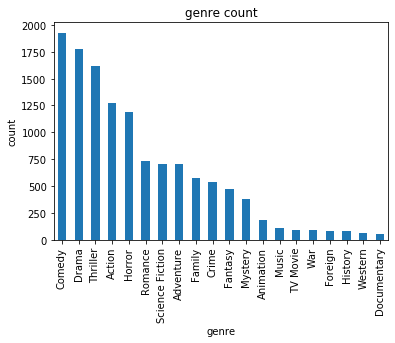

In [18]:
genre_count.plot(kind='bar');
plt.title('genre count')
plt.xlabel('genre')
plt.ylabel('count')

从条形图可以看出：评分低的电影中，Comedy（喜剧）、Drama（戏剧）、Thriller（恐怖）、Action（动作）、Horror（惊悚）五种类型比较多。

### 研究问题 2：电影票房和上映月份是否有关系？

In [19]:
df_2['month'] = df_2['release_date'].dt.month
df_2.head()

,id,budget,revenue,original_title,genres,release_date,vote_count,vote_average,release_year,month
0,135397,150000000,1513528810,Jurassic World,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,6
1,76341,150000000,378436354,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,5
2,262500,110000000,295238201,Insurgent,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,3
3,140607,200000000,2068178225,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,12
4,168259,190000000,1506249360,Furious 7,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,4


In [20]:
month_revenue = df_2.groupby(['month'])['revenue'].mean()

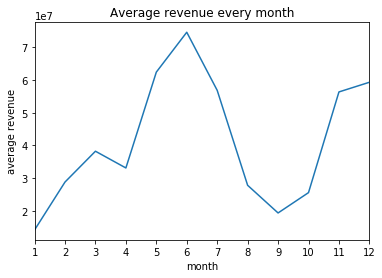

In [21]:
month_revenue.plot.line(x='month', y='revenue');
plt.title('Average revenue every month')
plt.ylabel('average revenue')
plt.xticks(range(1, 13));

可以看出，总体上，呈现出5-7月和11-12月的平均票房高于其他月份的趋势。

<a id='conclusions'></a>
## 结论
结论1：评分低的电影中，Comedy（喜剧）、Drama（戏剧）、Thriller（恐怖）、Action（动作）、Horror（惊悚）五种类型比较多。  
结论2：总体上，呈现出5-7月和11-12月的平均票房高于其他月份的趋势。

本次分析的局限性：
- 所探索的特征比较少，勉强支撑所得到的结论。
- 只使用了数据中的一个子集来分析数据，勉强支撑所得到的结论。